In [1]:
#Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as mplt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
# pd.pandas.set_option('display.max_rows',None)
pd.pandas.set_option('display.max_columns',None)

### Data Collection

In [2]:
df_train=pd.read_csv("../input/house-prices-advanced-regression-techniques/train.csv")
df_test=pd.read_csv("../input/house-prices-advanced-regression-techniques/test.csv")

In [3]:

df_train = pd.concat([df_train,df_test],ignore_index=True)

In [4]:
print(df_train.shape)
df_train.head(10)


(2919, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732.0,Unf,0.0,64.0,796.0,GasA,Ex,Y,SBrkr,796,566,0,1362,1.0,0.0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2.0,480.0,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000.0
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369.0,Unf,0.0,317.0,1686.0,GasA,Ex,Y,SBrkr,1694,0,0,1694,1.0,0.0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2.0,636.0,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000.0
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859.0,BLQ,32.0,216.0,1107.0,GasA,Ex,Y,SBrkr,1107,983,0,2090,1.0,0.0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2.0,484.0,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000.0
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0.0,Unf,0.0,952.0,952.0,GasA,Gd,Y,FuseF,1022,752,0,1774,0.0,0.0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2.0,468.0,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900.0
9,10,190,RL,50.0,7420,Pave,NaN,

### Data Cleaning and Preprocessing

In [5]:
feature_num_nanvalues = [feature for feature in df_train.columns if df_train[feature].isnull().sum()>=1 and df_train[feature].dtypes!='O']
for feature in feature_num_nanvalues:
    print("{}:{}% missing values".format(feature,np.round(df_train[feature].isnull().mean(),4)))

LotFrontage:0.1665% missing values
MasVnrArea:0.0079% missing values
BsmtFinSF1:0.0003% missing values
BsmtFinSF2:0.0003% missing values
BsmtUnfSF:0.0003% missing values
TotalBsmtSF:0.0003% missing values
BsmtFullBath:0.0007% missing values
BsmtHalfBath:0.0007% missing values
GarageYrBlt:0.0545% missing values
GarageCars:0.0003% missing values
GarageArea:0.0003% missing values
SalePrice:0.4998% missing values


In [6]:
# Replace Missing Numerical Values
def replace_numerical_values(dataset,feature_num_nanvalues):
    data = dataset.copy()
    for feature in feature_num_nanvalues:
        median_value = data[feature].median()
         ## create a new feature to capture nan values
        data[feature+'nan']=np.where(data[feature].isnull(),1,0)
        data[feature].fillna(median_value,inplace=True)
    return data
    
df_train = replace_numerical_values(df_train,feature_num_nanvalues)
df_train[feature_num_nanvalues].isnull().sum()
df_train.shape

(2919, 93)

In [7]:
feature_cate_nanValues = [feature for feature in df_train.columns if df_train[feature].isnull().sum()>=1 and df_train[feature].dtypes=='O']
for feature in feature_cate_nanValues:
    print("{}:{}% missing values".format(feature,np.round(df_train[feature].isnull().mean(),4)))

MSZoning:0.0014% missing values
Alley:0.9322% missing values
Utilities:0.0007% missing values
Exterior1st:0.0003% missing values
Exterior2nd:0.0003% missing values
MasVnrType:0.0082% missing values
BsmtQual:0.0277% missing values
BsmtCond:0.0281% missing values
BsmtExposure:0.0281% missing values
BsmtFinType1:0.0271% missing values
BsmtFinType2:0.0274% missing values
Electrical:0.0003% missing values
KitchenQual:0.0003% missing values
Functional:0.0007% missing values
FireplaceQu:0.4865% missing values
GarageType:0.0538% missing values
GarageFinish:0.0545% missing values
GarageQual:0.0545% missing values
GarageCond:0.0545% missing values
PoolQC:0.9966% missing values
Fence:0.8044% missing values
MiscFeature:0.964% missing values
SaleType:0.0003% missing values


In [8]:
#Replace Categorical Values
def replace_cat_feature(dataset,feature_nan):
    data = dataset.copy()
    data[feature_nan]= data[feature_nan].fillna("Missing")
    return data
df_train = replace_cat_feature(df_train,feature_cate_nanValues)
df_train[feature_cate_nanValues].isnull().sum()

MSZoning        0
Alley           0
Utilities       0
Exterior1st     0
Exterior2nd     0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
Electrical      0
KitchenQual     0
Functional      0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
SaleType        0
dtype: int64

In [9]:
df_train.head()
df_train.shape

(2919, 93)

### Data Exploration and Analysis

3.023498299566167


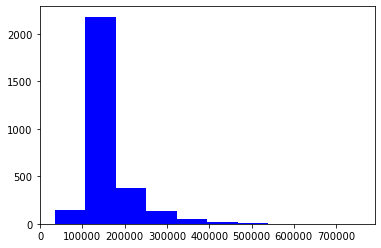

In [10]:
print(df_train.SalePrice.skew())
mplt.hist(df_train.SalePrice,color='blue')
mplt.show()

Target skew is 0.29055164794995275


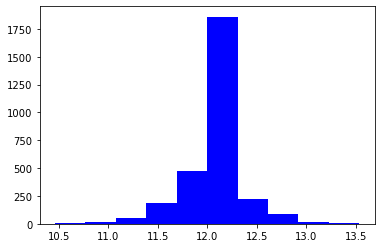

In [11]:
#To improve linearity of the target depended data
target=np.log(df_train.SalePrice)
print("Target skew is",target.skew())
mplt.hist(target,color='blue')
mplt.show()
#histogram
#sns.distplot(df_train['SalePrice']);

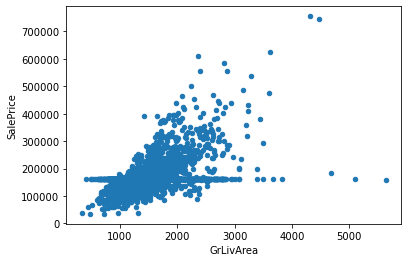

In [12]:

df_train.plot(x='GrLivArea', y='SalePrice', kind='scatter')

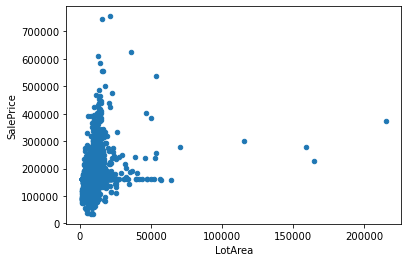

In [13]:
#optional: plot MEDV vs RM using the plot method of the dataframe (using kind="scatter").
df_train.plot(x='LotArea', y='SalePrice', kind='scatter')

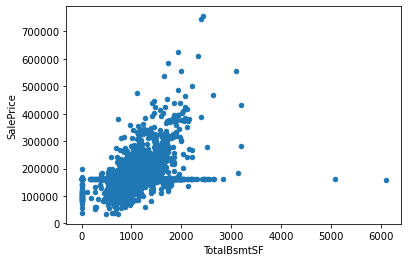

In [14]:

df_train.plot(x='TotalBsmtSF', y='SalePrice', kind='scatter')

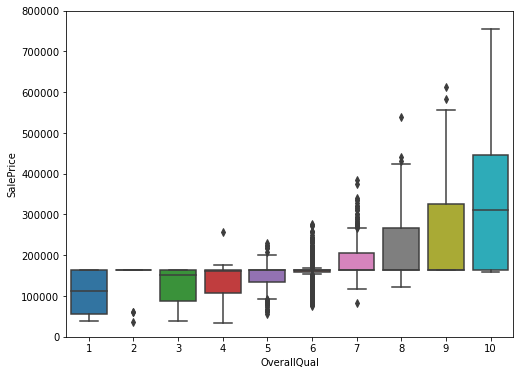

In [15]:
#box plot overallqual/saleprice
var = 'OverallQual'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = mplt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

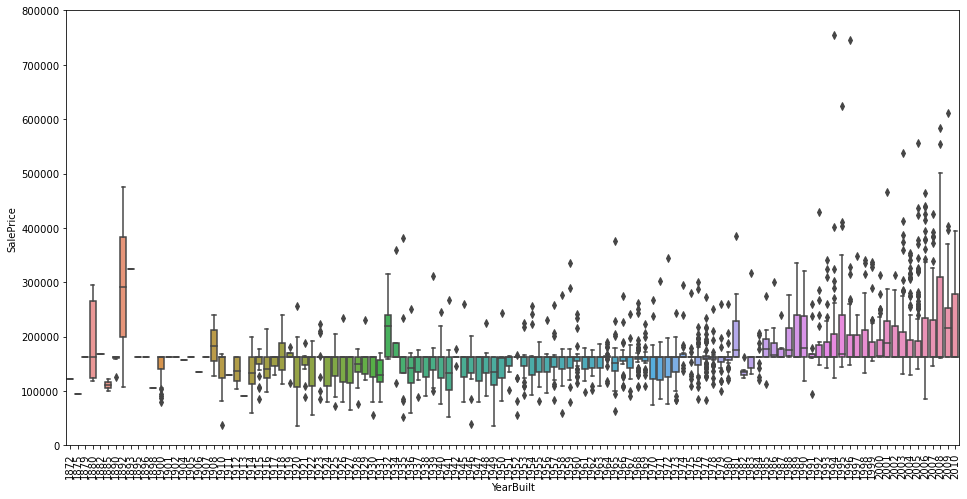

In [16]:
var = 'YearBuilt'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = mplt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
mplt.xticks(rotation=90);

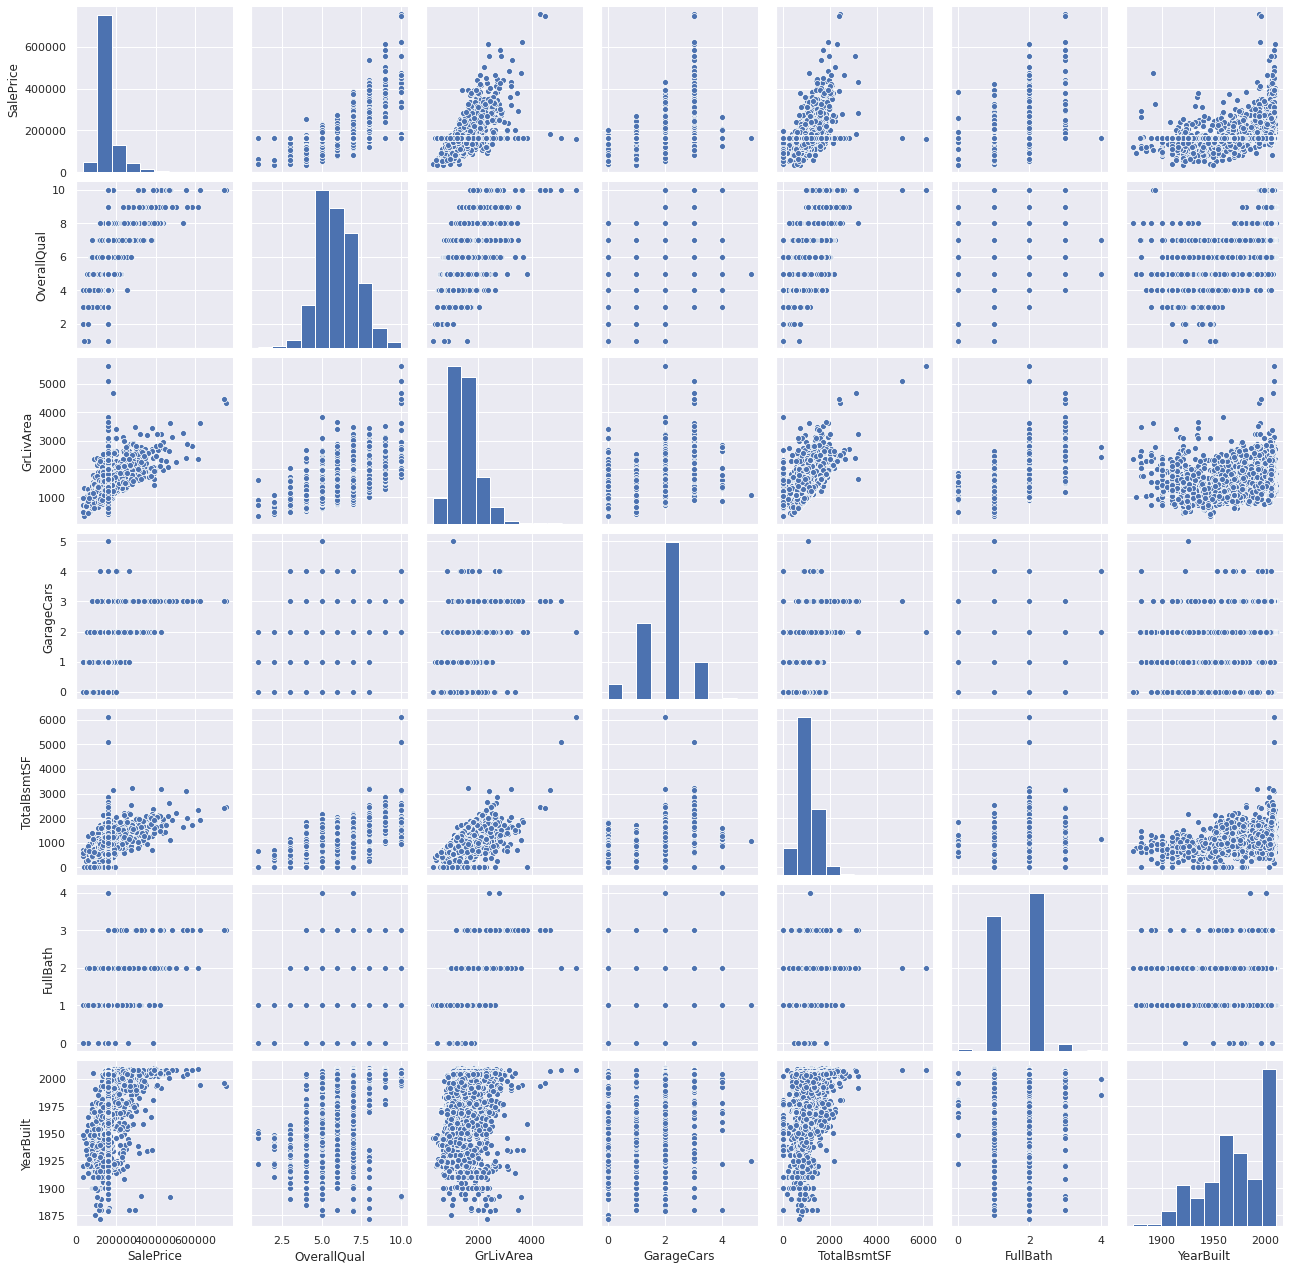

In [17]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols], size = 2.5)
mplt.show();

In [18]:
## Temporal Variables (Date Time Variables)

for feature in ['YearBuilt','YearRemodAdd','GarageYrBlt']:
       
    df_train[feature]=df_train['YrSold']-df_train[feature]
    
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,BsmtFinSF1nan,BsmtFinSF2nan,BsmtUnfSFnan,TotalBsmtSFnan,BsmtFullBathnan,BsmtHalfBathnan,GarageYrBltnan,GarageCarsnan,GarageAreanan,SalePricenan
0,1,60,RL,65.0,8450,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,5,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,5.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,Missing,Missing,Missing,0,2,2008,WD,Normal,208500.0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,20,RL,80.0,9600,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,31,31,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,31.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,181500.0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,60,RL,68.0,11250,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,7,6,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,7.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,Missing,Missing,Missing,0,9,2008,WD,Normal,223500.0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,70,RL,60.0,9550,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,91,36,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,8.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,140000.0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,60,RL,84.0,14260,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,8,8,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,8.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,Missing,Missing,Missing,0,12,2008,WD,Normal,250000.0,0,0,0,0,0,0,0,0,0,0,0,0


In [19]:
df_train[['YearBuilt','YearRemodAdd','GarageYrBlt']].head()

,YearBuilt,YearRemodAdd,GarageYrBlt
0,5,5,5.0
1,31,31,31.0
2,7,6,7.0
3,91,36,8.0
4,8,8,8.0


## Numerical Variables
Since the numerical variables are skewed we will perform log normal distribution

In [20]:
num_features=['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']
for feature in num_features:
    df_train[feature]=np.log(df_train[feature])

In [21]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,BsmtFinSF1nan,BsmtFinSF2nan,BsmtUnfSFnan,TotalBsmtSFnan,BsmtFullBathnan,BsmtHalfBathnan,GarageYrBltnan,GarageCarsnan,GarageAreanan,SalePricenan
0,1,60,RL,4.174387,9.041922,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,5,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,6.752270,854,0,7.444249,1.0,0.0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,5.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,Missing,Missing,Missing,0,2,2008,WD,Normal,12.247694,0,0,0,0,0,0,0,0,0,0,0,0
1,2,20,RL,4.382027,9.169518,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,31,31,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,7.140453,0,0,7.140453,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,31.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,12.109011,0,0,0,0,0,0,0,0,0,0,0,0
2,3,60,RL,4.219508,9.328123,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,7,6,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,6.824374,866,0,7.487734,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,7.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,Missing,Missing,Missing,0,9,2008,WD,Normal,12.317167,0,0,0,0,0,0,0,0,0,0,0,0
3,4,70,RL,4.094345,9.164296,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,91,36,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,6.867974,756,0,7.448334,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,8.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,11.849398,0,0,0,0,0,0,0,0,0,0,0,0
4,5,60,RL,4.430817,9.565214,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,8,8,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,7.043160,1053,0,7.695303,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,8.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,Missing,Missing,Missing,0,12,2008,WD,Normal,12.429216,0,0,0,0,0,0,0,0,0,0,0,0


In [22]:
cat_feature = [feature for feature in df_train.columns if df_train[feature].dtype=='O']
cat_feature
print(len(cat_feature))
df_train.shape


43


(2919, 93)

In [23]:
# let's have a look at how many labels each variable has
for feature in df_train.columns:
    if df_train[feature].dtype=='O':
        print(feature,':',len(df_train[feature].unique()),'label')


MSZoning : 6 label
Street : 2 label
Alley : 3 label
LotShape : 4 label
LandContour : 4 label
Utilities : 3 label
LotConfig : 5 label
LandSlope : 3 label
Neighborhood : 25 label
Condition1 : 9 label
Condition2 : 8 label
BldgType : 5 label
HouseStyle : 8 label
RoofStyle : 6 label
RoofMatl : 8 label
Exterior1st : 16 label
Exterior2nd : 17 label
MasVnrType : 5 label
ExterQual : 4 label
ExterCond : 5 label
Foundation : 6 label
BsmtQual : 5 label
BsmtCond : 5 label
BsmtExposure : 5 label
BsmtFinType1 : 7 label
BsmtFinType2 : 7 label
Heating : 6 label
HeatingQC : 5 label
CentralAir : 2 label
Electrical : 6 label
KitchenQual : 5 label
Functional : 8 label
FireplaceQu : 6 label
GarageType : 7 label
GarageFinish : 4 label
GarageQual : 6 label
GarageCond : 6 label
PavedDrive : 3 label
PoolQC : 4 label
Fence : 5 label
MiscFeature : 5 label
SaleType : 10 label
SaleCondition : 6 label


In [24]:
# Exterior1st
df_train.Exterior1st.value_counts().sort_values(ascending=False).head(10)

VinylSd    1025
MetalSd     450
HdBoard     442
Wd Sdng     411
Plywood     221
CemntBd     126
BrkFace      87
WdShing      56
AsbShng      44
Stucco       43
Name: Exterior1st, dtype: int64

In [25]:
df_train.isnull().sum().sum()


0

### Preprocessing Data 2

In [26]:
#Integer conversions (Label Encoder)
from sklearn.preprocessing import LabelEncoder
lc = LabelEncoder()

for i in cat_feature:
     df_train[i] = lc.fit_transform(df_train[i])
    
df_train.shape
# df_train.head(10)

(2919, 93)

In [27]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,BsmtFinSF1nan,BsmtFinSF2nan,BsmtUnfSFnan,TotalBsmtSFnan,BsmtFullBathnan,BsmtHalfBathnan,GarageYrBltnan,GarageCarsnan,GarageAreanan,SalePricenan
0,1,60,4,4.174387,9.041922,1,1,3,3,0,4,0,5,2,2,0,5,7,5,5,5,1,1,13,14,1,196.0,2,4,2,2,4,4,2,706.0,6,0.0,150.0,856.0,1,0,1,5,6.752270,854,0,7.444249,1.0,0.0,2,1,3,1,2,8,7,0,3,1,5.0,2,2.0,548.0,5,5,2,0,61,0,0,0,0,3,2,1,0,2,2008,9,4,12.247694,0,0,0,0,0,0,0,0,0,0,0,0
1,2,20,4,4.382027,9.169518,1,1,3,3,0,2,0,24,1,2,0,2,6,8,31,31,1,1,8,8,3,0.0,3,4,1,2,4,1,0,978.0,6,0.0,284.0,1262.0,1,0,1,5,7.140453,0,0,7.140453,0.0,1.0,2,0,3,1,4,6,7,1,5,1,31.0,2,2.0,460.0,5,5,2,298,0,0,0,0,0,3,2,1,0,5,2007,9,4,12.109011,0,0,0,0,0,0,0,0,0,0,0,0
2,3,60,4,4.219508,9.328123,1,1,0,3,0,4,0,5,2,2,0,5,7,5,7,6,1,1,13,14,1,162.0,2,4,2,2,4,3,2,486.0,6,0.0,434.0,920.0,1,0,1,5,6.824374,866,0,7.487734,1.0,0.0,2,1,3,1,2,6,7,1,5,1,7.0,2,2.0,608.0,5,5,2,0,42,0,0,0,0,3,2,1,0,9,2008,9,4,12.317167,0,0,0,0,0,0,0,0,0,0,0,0
3,4,70,4,4.094345,9.164296,1,1,0,3,0,0,0,6,2,2,0,5,7,5,91,36,1,1,14,16,3,0.0,3,4,0,4,1,4,0,216.0,6,0.0,540.0,756.0,1,2,1,5,6.867974,756,0,7.448334,1.0,0.0,1,0,3,1,2,7,7,1,2,5,8.0,3,3.0,642.0,5,5,2,0,35,272,0,0,0,3,2,1,0,2,2006,9,0,11.849398,0,0,0,0,0,0,0,0,0,0,0,0
4,5,60,4,4.430817,9.565214,1,1,0,3,0,2,0,15,2,2,0,5,8,5,8,8,1,1,13,14,1,350.0,2,4,2,2,4,0,2,655.0,6,0.0,490.0,1145.0,1,0,1,5,7.043160,1053,0,7.695303,1.0,0.0,2,1,4,1,2,9,7,1,5,1,8.0,2,3.0,836.0,5,5,2,192,84,0,0,0,0,3,2,1,0,12,2008,9,4,12.429216,0,0,0,0,0,0,0,0,0,0,0,0


In [28]:
df_train[cat_feature].shape

(2919, 43)

In [29]:
X = df_train.drop('SalePrice', axis='columns')
X.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontagenan,MasVnrAreanan,BsmtFinSF1nan,BsmtFinSF2nan,BsmtUnfSFnan,TotalBsmtSFnan,BsmtFullBathnan,BsmtHalfBathnan,GarageYrBltnan,GarageCarsnan,GarageAreanan,SalePricenan
0,1,60,4,4.174387,9.041922,1,1,3,3,0,4,0,5,2,2,0,5,7,5,5,5,1,1,13,14,1,196.0,2,4,2,2,4,4,2,706.0,6,0.0,150.0,856.0,1,0,1,5,6.752270,854,0,7.444249,1.0,0.0,2,1,3,1,2,8,7,0,3,1,5.0,2,2.0,548.0,5,5,2,0,61,0,0,0,0,3,2,1,0,2,2008,9,4,0,0,0,0,0,0,0,0,0,0,0,0
1,2,20,4,4.382027,9.169518,1,1,3,3,0,2,0,24,1,2,0,2,6,8,31,31,1,1,8,8,3,0.0,3,4,1,2,4,1,0,978.0,6,0.0,284.0,1262.0,1,0,1,5,7.140453,0,0,7.140453,0.0,1.0,2,0,3,1,4,6,7,1,5,1,31.0,2,2.0,460.0,5,5,2,298,0,0,0,0,0,3,2,1,0,5,2007,9,4,0,0,0,0,0,0,0,0,0,0,0,0
2,3,60,4,4.219508,9.328123,1,1,0,3,0,4,0,5,2,2,0,5,7,5,7,6,1,1,13,14,1,162.0,2,4,2,2,4,3,2,486.0,6,0.0,434.0,920.0,1,0,1,5,6.824374,866,0,7.487734,1.0,0.0,2,1,3,1,2,6,7,1,5,1,7.0,2,2.0,608.0,5,5,2,0,42,0,0,0,0,3,2,1,0,9,2008,9,4,0,0,0,0,0,0,0,0,0,0,0,0
3,4,70,4,4.094345,9.164296,1,1,0,3,0,0,0,6,2,2,0,5,7,5,91,36,1,1,14,16,3,0.0,3,4,0,4,1,4,0,216.0,6,0.0,540.0,756.0,1,2,1,5,6.867974,756,0,7.448334,1.0,0.0,1,0,3,1,2,7,7,1,2,5,8.0,3,3.0,642.0,5,5,2,0,35,272,0,0,0,3,2,1,0,2,2006,9,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,60,4,4.430817,9.565214,1,1,0,3,0,2,0,15,2,2,0,5,8,5,8,8,1,1,13,14,1,350.0,2,4,2,2,4,0,2,655.0,6,0.0,490.0,1145.0,1,0,1,5,7.043160,1053,0,7.695303,1.0,0.0,2,1,4,1,2,9,7,1,5,1,8.0,2,3.0,836.0,5,5,2,192,84,0,0,0,0,3,2,1,0,12,2008,9,4,0,0,0,0,0,0,0,0,0,0,0,0


In [30]:
# column_trans.fit_transform(X)
df_train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage        0
LotArea            0
                  ..
BsmtHalfBathnan    0
GarageYrBltnan     0
GarageCarsnan      0
GarageAreanan      0
SalePricenan       0
Length: 93, dtype: int64

In [31]:
## Always remember there way always be a chance of data leakage so we need to split the data first and then apply feature
## Engineering
from sklearn.model_selection import train_test_split
X = df_train.drop('SalePrice', axis='columns')
y = df_train['SalePrice']
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [32]:
## for feature slection

from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

### Apply Feature Selection
# first, I specify the Lasso Regression model, and I
# select a suitable alpha (equivalent of penalty).
# The bigger the alpha the less features that will be selected.

# Then I use the selectFromModel object from sklearn, which
# will select the features which coefficients are non-zero

feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0)) # remember to set the seed, the random state in this function
feature_sel_model.fit(X,y)



SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [33]:
feature_sel_model.get_support()

array([False,  True, False, False,  True, False, False, False,  True,
       False, False, False,  True, False, False, False,  True,  True,
        True,  True,  True, False,  True,  True, False,  True,  True,
       False, False, False,  True, False,  True,  True,  True, False,
       False, False,  True, False,  True, False,  True, False,  True,
        True, False, False, False, False, False, False, False,  True,
        True,  True,  True, False,  True,  True, False, False,  True,
       False, False, False,  True, False,  True,  True,  True,  True,
       False, False, False,  True,  True, False,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False])

In [34]:
# let's print the number of total and selected features

# this is how we can make a list of the selected features
selected_feat = X.columns[(feature_sel_model.get_support())]

# let's print some stats
print('total features: {}'.format((X.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(np.sum(feature_sel_model.estimator_.coef_ == 0)))

total features: 92
selected features: 38
features with coefficients shrank to zero: 50


In [35]:
selected_feat
X=X[selected_feat]
X

,MSSubClass,LotArea,LandContour,Neighborhood,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofMatl,Exterior1st,MasVnrType,MasVnrArea,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,TotalBsmtSF,HeatingQC,Electrical,2ndFlrSF,LowQualFinSF,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageArea,WoodDeckSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SaleType,SaleCondition
0,60,9.041922,3,5,5,7,5,5,5,1,13,1,196.0,2,4,2,706.0,856.0,0,5,854,0,2,8,7,0,1,5.0,548.0,0,0,0,0,0,0,2,9,4
1,20,9.169518,3,24,2,6,8,31,31,1,8,3,0.0,2,1,0,978.0,1262.0,0,5,0,0,4,6,7,1,1,31.0,460.0,298,0,0,0,0,0,5,9,4
2,60,9.328123,3,5,5,7,5,7,6,1,13,1,162.0,2,3,2,486.0,920.0,0,5,866,0,2,6,7,1,1,7.0,608.0,0,0,0,0,0,0,9,9,4
3,70,9.164296,3,6,5,7,5,91,36,1,14,3,0.0,4,4,0,216.0,756.0,2,5,756,0,2,7,7,1,5,8.0,642.0,0,272,0,0,0,0,2,9,0
4,60,9.565214,3,15,5,8,5,8,8,1,13,1,350.0,2,0,2,655.0,1145.0,0,5,1053,0,2,9,7,1,1,8.0,836.0,192,0,0,0,0,0,12,9,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,7.568379,3,10,5,4,7,36,36,1,5,3,0.0,4,4,6,0.0,546.0,2,5,546,0,4,5,7,0,6,27.0,0.0,0,0,0,0,0,0,6,9,4
2915,160,7.546446,3,10,5,4,5,36,36,1,5,3,0.0,4,4,5,252.0,546.0,4,5,546,0,4,6,7,0,4,36.0,286.0,0,0,0,0,0,0,4,9,0
2916,20,9.903488,3,11,2,5,7,46,10,1,13,3,0.0,4,4,0,1224.0,1224.0,0,5,0,0,4,7,7,1,5,46.0,576.0,474,0,0,0,0,0,9,9,0
2917,85,9.253496,3,11,6,5,5,14,14,1,6,3,0.0,2,0,2,337.0,912.0,4,5,0,0,4,6,7,0,6,27.0,0.0,80,0,0,0,0,700,7,9,4


In [36]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.5,random_state=0)
X_train.shape,X_test.shape

((1459, 38), (1460, 38))

In [37]:
from sklearn.linear_model import LinearRegression



lr = LinearRegression().fit(X_train, y_train)


print(lr.score(X_test, y_test))


0.4301259916963892


In [38]:
coeff_df = pd.DataFrame(lr.coef_, X.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
MSSubClass,0.000013
LotArea,0.057349
LandContour,0.023744
Neighborhood,-0.000401
HouseStyle,-0.003960
OverallQual,0.030831
OverallCond,0.016915
YearBuilt,-0.001215
YearRemodAdd,-0.001098
RoofMatl,0.022114


In [39]:
y_pred = lr.predict(X_test)

In [40]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(25)
print(df1)

         Actual  Predicted
1815  12.001505  11.775367
2871  12.001505  11.587629
1232  11.530765  11.806858
1977  12.001505  12.324366
22    12.345835  12.127746
1642  12.001505  12.152729
2200  12.001505  11.910504
117   11.951180  11.943004
1355  12.043554  12.075772
502   11.849398  11.889417
227   11.571194  11.742741
2540  12.001505  12.116530
1827  12.001505  11.892829
1023  12.160029  12.019189
2682  12.001505  12.618178
1948  12.001505  12.159558
2890  12.001505  11.914016
850   11.786762  11.901697
2357  12.001505  12.114983
311   11.790557  11.904524
2033  12.001505  11.906760
217   11.580584  11.776032
1702  12.001505  12.145822
923   12.170445  12.027659
2633  12.001505  12.357492


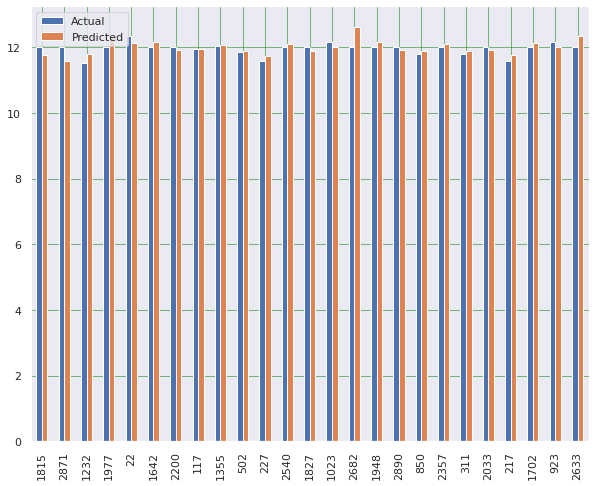

In [41]:
df1.plot(kind='bar',figsize=(10,8))
mplt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
mplt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
mplt.show()

In [42]:

print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

NameError: name 'mean_absolute_error' is not defined

In [43]:
df_train['SalePrice'].head()

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: SalePrice, dtype: float64

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, cross_val_predict


lm = LinearRegression()

#Next we do cross validation, which splits apart our training data and fits the model on different samples and 
# gives scores for each sample to get the best fit model before we test it on the testing data.

scores = cross_val_score(lm, X_train, y_train, cv = 5)    #cv is the number of folds, scores will give an array of scores

print (scores, np.mean(scores), np.std(scores))

#To get predictions (y_hat) and check them all in one using cross validation

predictions = cross_val_predict(lm, X_test, y_test, cv = 5)     #y_test is needed here in predictions to get scores for each fold of cv


#If this is good, continue to fit the model on the data


lm.fit(X_train, y_train)

y_hat = lm.predict(X_test)      #this gives me my predictions

lm.score(X_test, y_test)     #this tells me my model performance

print('Score Value: \n', lm.score(X_test, y_test))
# The coefficients
#print('Coefficients: \n', lr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_hat))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.4f'
      % r2_score(y_test, predictions))



[0.47011796 0.39589825 0.38401309 0.31070254 0.30188716] 0.37252379956605797 0.061667480548588435
Score Value: 
 0.4301259916963892
Mean squared error: 0.04


NameError: name 'r2_score' is not defined

In [45]:
# Building the Model ------------------------------------------------------------------------

# Fitting regressior to the Training set
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, make_scorer

steps = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=1)),
    ('model', Ridge())
]

ridge_pipe = Pipeline(steps)
ridge_pipe.fit(X_train, y_train)

# Predicting the Test set results
y_pred = ridge_pipe.predict(X_test)


print(ridge_pipe.score(X_test,y_test))

0.4301311618216348


In [46]:
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(StandardScaler(), Ridge())
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)


0.43013116182163424

In [47]:
from sklearn.ensemble import GradientBoostingRegressor
# Fit regression model
reg = GradientBoostingRegressor(random_state=0)
reg.fit(X_train, y_train)
# reg.predict(X_test)

# y=df_test['SalePrice']
reg.predict(X_test)
print("Score value:%.3f"%reg.score(X_test, y_test))
y_hat = reg.predict(X_test) 
print('Mean squared error: %.3f'
      % mean_squared_error(y_test,y_hat))
print('Root Mean Squared Error:%.3f'%np.sqrt(mean_squared_error(y_test, y_hat)))


Score value:0.385
Mean squared error: 0.047
Root Mean Squared Error:0.218


In [48]:

af = pd.read_csv("../input/house-prices-advanced-regression-techniques/sample_submission.csv")
dataset=pd.DataFrame({'SalePrice':y_hat})
df = pd.concat([af['Id'],dataset],axis=1)

df.head()

df.to_csv('../input/house-prices-advanced-regression-techniques/final_submission.csv', index=False)

OSError: [Errno 30] Read-only file system: '../input/house-prices-advanced-regression-techniques/final_submission.csv'

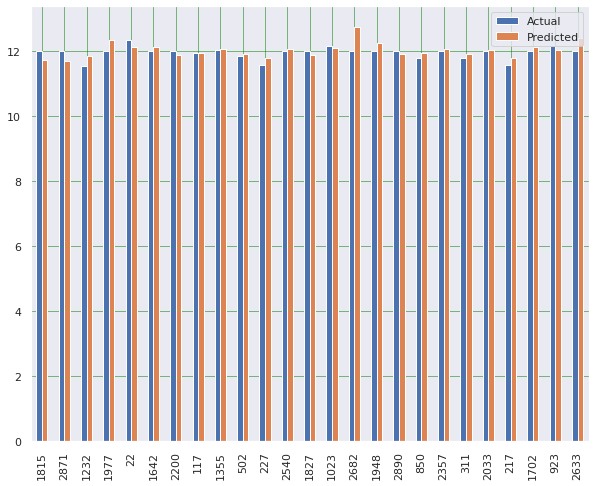

In [49]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_hat})
df1 = df.head(25)
df1.plot(kind='bar',figsize=(10,8))
mplt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
mplt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
mplt.show()

In [50]:
from sklearn.ensemble import GradientBoostingClassifier

param_grid={'n_estimators':[100,500], 
            'learning_rate': [0.1,0.05,0.02],
            'max_depth':[4], 
            'min_samples_leaf':[3], 
            'max_features':[1.0] } 
tuning = GridSearchCV(estimator=GradientBoostingRegressor(), cv=3, param_grid=param_grid, 
    n_jobs=4)
tuning.fit(X_train,y_train)
tuning.predict(X_test)
print("Score value:%.3f"%tuning.score(X_test, y_test))
y_hat = tuning.predict(X_test) 
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_hat))


NameError: name 'GridSearchCV' is not defined

In [51]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
# import xgboost as xgb
# import lightgbm as lgb

In [52]:
# Cross-validation with k-folds
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X_train.values)
    rmse= np.sqrt(-cross_val_score(model, X_train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [53]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

In [54]:
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = rmsle_cv(GBoost)


Lasso score: 0.2257 (0.0166)

ElasticNet score: 0.2257 (0.0166)

Kernel Ridge score: 1.7740 (1.3578)



In [55]:


# Performing Grid Search with specific alpha values for Ridge
alphas = np.array([1,0.1,0.01,0.001,0.0001])
model = Ridge()
grid = GridSearchCV(estimator=model, param_grid=dict(alpha=alphas))
grid.fit(X_train, y_train)
print(grid)
# summarize the results of the grid search
print(grid.best_score_)
print(grid.best_estimator_.alpha)



NameError: name 'GridSearchCV' is not defined

In [56]:


# Performing Grid Search with specific of alpha values for Lasso
alphas = np.array([1,0.1,0.01,0.001,0.0001])
model = Lasso()
grid = GridSearchCV(estimator=model, param_grid=dict(alpha=alphas))
grid.fit(X_train, y_train)
print(grid)
# summarize the results of the grid search
print(grid.best_score_)
print(grid.best_estimator_.alpha)



NameError: name 'GridSearchCV' is not defined

In [57]:
# Performing Grid Search specific alpha values for ElasticNet
alphas = np.array([1,0.1,0.01,0.001,0.0001])
model = ElasticNet()
grid = GridSearchCV(estimator=model, param_grid=dict(alpha=alphas))
grid.fit(X_train, y_train)
print(grid)
# summarize the results of the grid search
print(grid.best_score_)
print(grid.best_estimator_.alpha)

NameError: name 'GridSearchCV' is not defined

In [58]:
# Applying the searched values of Alpha and l1_ratio
model1 = Ridge(alpha=0.923990115671)
model2 = Lasso(alpha=0.968154257543)
model3 = ElasticNet(alpha=0.001, l1_ratio=0.99411629749)
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)
model3.fit(X_train, y_train)
pred1 = model1.predict(X_test)
pred2 = model2.predict(X_test)
pred3 = model3.predict(X_test)

In [59]:
print("Score value:%.3f"%model1.score(X_test, y_test))
print("Score value:%.3f"%model2.score(X_test, y_test))
print("Score value:%.3f"%model3.score(X_test, y_test))

Score value:0.430
Score value:0.351
Score value:0.430


In [60]:
finalpred = 0.33*pred1 + 0.33*pred2 + 0.34*pred3
#sample = sample.rename_axis('Id').reset_index()
af = pd.read_csv("../input/house-prices-advanced-regression-techniques/sample_submission.csv")
dataset=pd.DataFrame({'SalePrice':finalpred})
df = pd.concat([af['Id'],dataset],axis=1)
#af = af.rename_axis('Id').reset_index()

#af['SalePrice'] = y_hat
# sample['Id'] = df_test['Id']
df.head()

df.to_csv('../input/house-prices-advanced-regression-techniques/final_submission.csv', index=False)

OSError: [Errno 30] Read-only file system: '../input/house-prices-advanced-regression-techniques/final_submission.csv'

In [61]:
from sklearn import ensemble

#lr =  ensemble.RandomForestRegressor(n_estimators = 100, oob_score = True, n_jobs = -1,random_state =50,max_features = "sqrt", min_samples_leaf = 50)
#lr = linear_model.LinearRegression()
lr = ensemble.GradientBoostingRegressor()


model = lr.fit(X_train, y_train)



print ("R^2 is: \n", model.score(X_test, y_test))



R^2 is: 
 0.3849453074844763
